In [1]:
import os
import numpy as np
import cv2

NUM_CLASSES = 5 # 分類するクラス数
IMG_SIZE_w = 32 # 画像の1辺の長さ
IMG_SIZE_h = 32 # 画像の1辺の長さ


# 画像のあるディレクトリ
train_img_dirs = ['boyish', 'cool', 'ojosama', 'sister', 'tsundere']

# 学習画像データ
train_image = []
# 学習データのラベル
train_label = []

test_image = []
test_label = []

color = (255, 255, 255)

In [2]:
# ルックアップテーブルの生成
min_table = 50
max_table = 205
diff_table = max_table - min_table

LUT_HC = np.arange(256, dtype = 'uint8' )
LUT_LC = np.arange(256, dtype = 'uint8' )

# ハイコントラストLUT作成
for i in range(0, min_table):
    LUT_HC[i] = 0
for i in range(min_table, max_table):
    LUT_HC[i] = 255 * (i - min_table) / diff_table
for i in range(max_table, 255):
    LUT_HC[i] = 255

# ローコントラストLUT作成
for i in range(256):
    LUT_LC[i] = min_table + i * (diff_table) / 255
    

In [3]:
from matplotlib import pylab as plt

## データセット読み込み

4


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:48: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:72: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


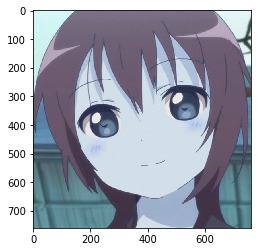

--------------
9


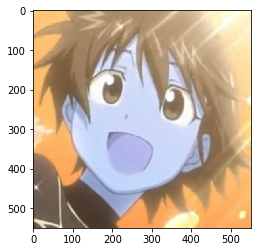

--------------
14


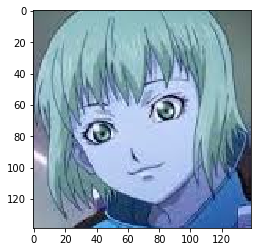

--------------
19


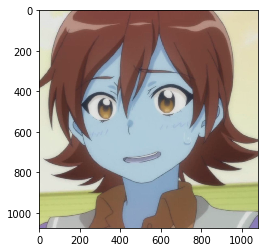

--------------
24


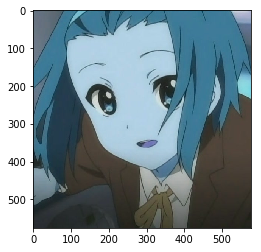

--------------
29


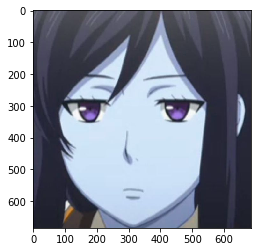

--------------
34


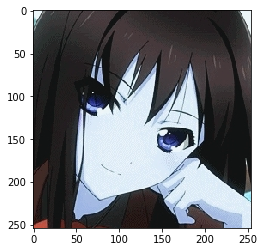

--------------
39


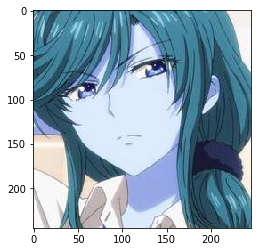

--------------
44


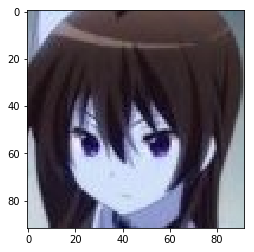

--------------
49


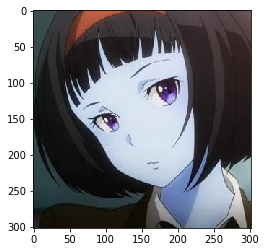

--------------
54


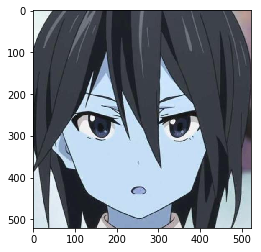

--------------
59


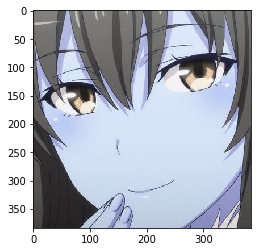

--------------
64


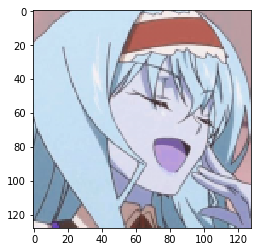

--------------
69


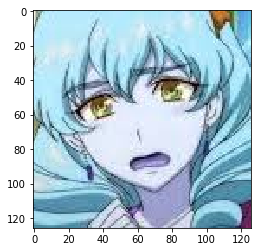

--------------
74


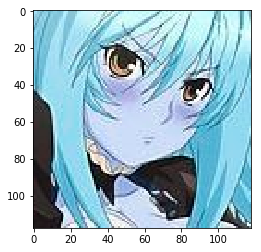

--------------
79


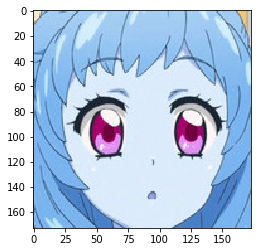

--------------
84


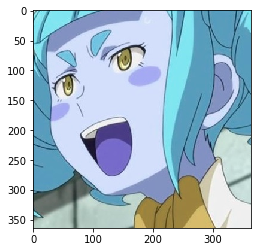

--------------
89


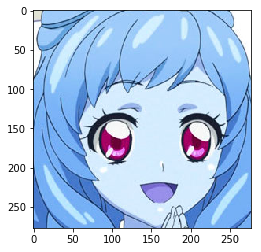

--------------
94


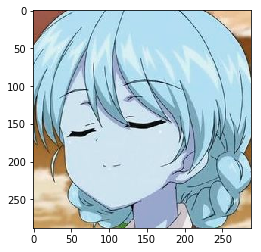

--------------
99


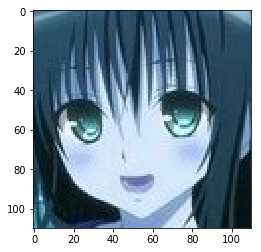

--------------
104


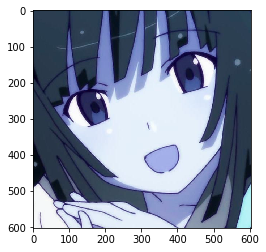

--------------
109


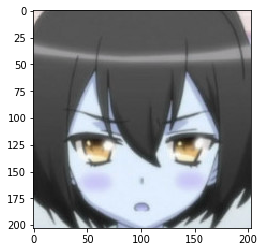

--------------
114


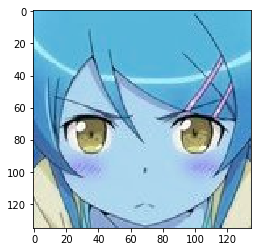

--------------
119


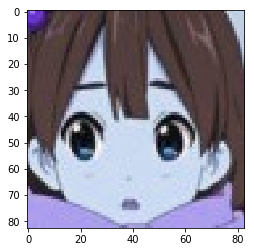

--------------
124


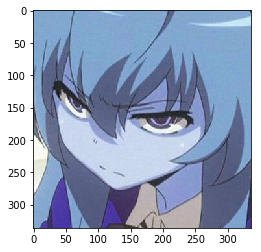

--------------
129


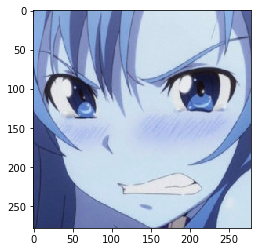

--------------
134


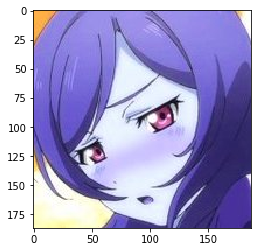

--------------
139


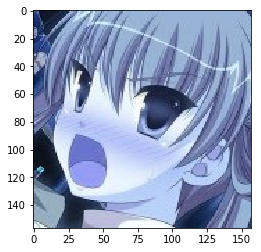

--------------
144


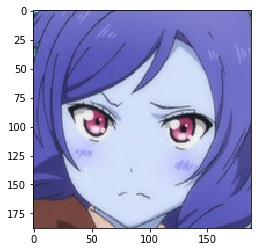

--------------
149


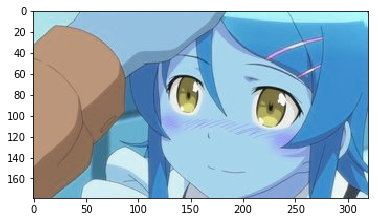

--------------
154


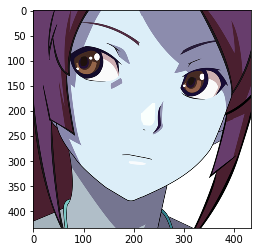

--------------


In [4]:
count = 0
for i, d in enumerate(train_img_dirs):
    # ./data/以下の各ディレクトリ内のファイル名取得
    files = os.listdir('./data/' + d)
    for f in files:
        count += 1
        # 画像読み込み
        img = cv2.imread('./data/' + d + '/' + f)
        if count % 5 == 0:
            print count - 1
            plt.imshow(img)
            plt.show()
            print "--------------"
        # 変換
        high_cont_img = cv2.LUT(img, LUT_HC)
        low_cont_img = cv2.LUT(img, LUT_LC)
        #print img
        if img != None:
            # 1辺がIMG_SIZEの正方形にリサイズ
            img = cv2.resize(img, (IMG_SIZE_w, IMG_SIZE_h))
            hflip_img = cv2.flip(img, 1)
            # 1列にして
            img = img.flatten().astype(np.float32)/255.0
            if count % 5 != 0:
                train_image.append(img)
            else:
                test_image.append(img)
                   
            # one_hot_vectorを作りラベルとして追加
            tmp = np.zeros(NUM_CLASSES)
            tmp[i] = 1
            if count % 5 != 0:
                train_label.append(tmp)
            else: test_label.append(tmp)
            
            # 1列にして
            img = hflip_img.flatten().astype(np.float32)/255.0
            if count % 5 != 0:
                train_image.append(img)
            else: test_image.append(img)
            # one_hot_vectorを作りラベルとして追加
            if count % 5 != 0:
                train_label.append(tmp)
            else: test_label.append(tmp)
            
            
            
        if high_cont_img != None:
            # 1辺がIMG_SIZEの正方形にリサイズ
            img = cv2.resize(high_cont_img, (IMG_SIZE_w, IMG_SIZE_h))
            hflip_img = cv2.flip(img, 1)
            # 1列にして
            img = img.flatten().astype(np.float32)/255.0
            if count % 5 != 0:
                train_image.append(img)
            else: test_image.append(img)
            if count % 5 != 0:
                train_label.append(tmp)
            else: test_label.append(tmp)
            
            # 1列にして
            img = hflip_img.flatten().astype(np.float32)/255.0
            if count % 5 != 0:
                train_image.append(img)
            else: test_image.append(img)
            # one_hot_vectorを作りラベルとして追加
            if count % 5 != 0:
                train_label.append(tmp)
            else: test_label.append(tmp)
            
            
        if low_cont_img != None:
            # 1辺がIMG_SIZEの正方形にリサイズ
            img = cv2.resize(low_cont_img, (IMG_SIZE_w, IMG_SIZE_h))
            hflip_img = cv2.flip(img, 1)
            # 1列にして
            img = img.flatten().astype(np.float32)/255.0
            if count % 5 != 0:
                train_image.append(img)
            else: test_image.append(img)
            # one_hot_vectorを作りラベルとして追加
            tmp = np.zeros(NUM_CLASSES)
            tmp[i] = 1
            if count % 5 != 0:
                train_label.append(tmp)
            else: test_label.append(tmp)
            
            # 1列にして
            img = hflip_img.flatten().astype(np.float32)/255.0
            if count % 5 != 0:
                train_image.append(img)
            else: test_image.append(img)
            # one_hot_vectorを作りラベルとして追加
            if count % 5 != 0:
                train_label.append(tmp)
            else: test_label.append(tmp)
            
        


            
# numpy配列に変換
train_image = np.asarray(train_image)
train_label = np.asarray(train_label)
test_image = np.asarray(test_image)
test_label = np.asarray(test_label)

In [5]:
print len(train_image)

732


In [6]:
print len(train_label)

732


In [7]:
print len(test_image)

186


In [8]:
print len(test_label)

186


## CNNの実装

In [14]:
COLOR_CHANNELS = 3 # RGB
IMG_PIXELS = IMG_SIZE_w * IMG_SIZE_h * COLOR_CHANNELS # 画像のサイズ*RGB

import tensorflow as tf
sess = tf.InteractiveSession()


In [15]:

x = tf.placeholder(tf.float32, shape=[None, IMG_PIXELS])
y_ = tf.placeholder(tf.float32, shape=[None, NUM_CLASSES])

W = tf.Variable(tf.zeros([IMG_PIXELS,NUM_CLASSES]))
b = tf.Variable(tf.zeros([NUM_CLASSES]))

sess.run(tf.initialize_all_variables())

y = tf.nn.softmax(tf.matmul(x,W) + b)

cross_entropy = -tf.reduce_sum(y_*tf.log(y))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)



Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [16]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


In [17]:
W_conv1 = weight_variable([5, 5, COLOR_CHANNELS, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, IMG_SIZE_w, IMG_SIZE_h, COLOR_CHANNELS])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([8 * 8 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, NUM_CLASSES])
b_fc2 = bias_variable([NUM_CLASSES])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


## モデルの学習

In [18]:
import random

STEPS = 50 # 学習ステップ数
BATCH_SIZE = 50 # バッチサイズ
tr_ac_list = []
te_ac_list = []

for i in range(STEPS):
  print i
  random_seq = range(len(train_image))
  random.shuffle(random_seq)
  for j in range(len(train_image)/BATCH_SIZE):
    batch = BATCH_SIZE * j
    train_image_batch = []
    train_label_batch = []
    for k in range(BATCH_SIZE):
      train_image_batch.append(train_image[random_seq[batch + k]])
      train_label_batch.append(train_label[random_seq[batch + k]])
    
    train_image_batch = np.array(train_image_batch)
    train_label_batch = np.array(train_label_batch)

    train_step.run(feed_dict={x: train_image_batch, y_: train_label_batch, keep_prob: 0.5})
    
  

  # 毎ステップ、学習データに対する正答率を表示
  train_accuracy = accuracy.eval(feed_dict={
      x:train_image, y_: train_label, keep_prob: 1.0})
  print("step %d, training accuracy %g"%(i, train_accuracy))
  tr_ac_list.append(train_accuracy)
  test_accuracy = accuracy.eval(feed_dict={
    x: test_image, y_: test_label, keep_prob: 1.0})
  print("test accuracy %g"% test_accuracy)
  te_ac_list.append(test_accuracy)

0
step 0, training accuracy 0.314208
test accuracy 0.354839
1
step 1, training accuracy 0.456284
test accuracy 0.317204
2
step 2, training accuracy 0.57377
test accuracy 0.478495
3
step 3, training accuracy 0.648907
test accuracy 0.505376
4
step 4, training accuracy 0.668033
test accuracy 0.462366
5
step 5, training accuracy 0.751366
test accuracy 0.494624
6
step 6, training accuracy 0.822404
test accuracy 0.494624
7
step 7, training accuracy 0.853825
test accuracy 0.505376
8
step 8, training accuracy 0.845628
test accuracy 0.489247
9
step 9, training accuracy 0.920765
test accuracy 0.532258
10
step 10, training accuracy 0.928962
test accuracy 0.537634
11
step 11, training accuracy 0.949454
test accuracy 0.526882
12
step 12, training accuracy 0.952186
test accuracy 0.516129
13
step 13, training accuracy 0.942623
test accuracy 0.526882
14
step 14, training accuracy 0.959016
test accuracy 0.505376
15
step 15, training accuracy 0.976776
test accuracy 0.543011
16
step 16, training accuracy

## 予測ラベルの確認

In [90]:
i = 144
print test_label[i]
print y_conv.eval(feed_dict={ x: [test_image[i]], keep_prob: 1.0 })[0]
print np.argmax(y_conv.eval(feed_dict={ x: [test_image[i]], keep_prob: 1.0 })[0])

[ 0.  0.  0.  0.  1.]
[ 0.01138305  0.00273626  0.16007468  0.00700219  0.81880379]
4


## モデルの予測精度の可視化

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.


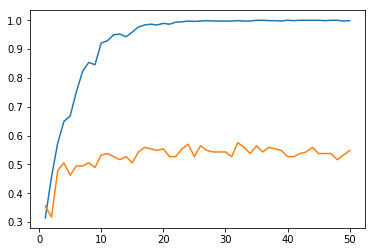

In [34]:
x_axis = np.array([i for i in range(1,51)])
y_axis = np.array(tr_ac_list)
y2_axis = np.array(te_ac_list)
plt.hold(True)
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y2_axis)
plt.show()
plt.savefig("result.png")

## ラベルごとの予測精度

In [93]:
print "boyish"
print("test accuracy %g"%accuracy.eval(feed_dict={x: test_image[0:30], y_: test_label[0:30], keep_prob: 1.0}))

print "cool"
print("test accuracy %g"%accuracy.eval(feed_dict={x: test_image[30:72], y_: test_label[30:72], keep_prob: 1.0}))

print "ojosama"
print("test accuracy %g"%accuracy.eval(feed_dict={x: test_image[72:114], y_: test_label[72:114], keep_prob: 1.0}))

print "sister"
print("test accuracy %g"%accuracy.eval(feed_dict={x: test_image[114:144], y_: test_label[114:144], keep_prob: 1.0}))

print "tsundere"
print("test accuracy %g"%accuracy.eval(feed_dict={x: test_image[144:], y_: test_label[144:], keep_prob: 1.0}))

boyish
test accuracy 0.2
cool
test accuracy 0.261905
ojosama
test accuracy 0.952381
sister
test accuracy 0.6
tsundere
test accuracy 0.690476


## 重みを見てみる

In [2]:
weights = sess.run(W_conv1)

NameError: name 'sess' is not defined

In [1]:
print weights[1]

NameError: name 'weights' is not defined

In [18]:
from matplotlib import pylab as plt
import matplotlib.cm as cm

In [38]:
f, axarr = plt.subplots(2, 5)
for idx in range(5):
    ax = axarr[int(idx / 5)][idx % 5]
    ax.imshow(weights[:, idx].reshape(28, 28,3))
    ax.set_title(str(idx))
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

ValueError: cannot reshape array of size 480 into shape (28,28,3)

In [ ]:
plt.show()